<a href="https://colab.research.google.com/github/Mildredkulei7/Regression_Moringa_core_IP_W6/blob/main/Moringa_DSC_IP_W6_Mildred_Kulei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

* 1. Rank of home team
* 2. Rank of away team
* 3. Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



## 1. Defining the Question

### a) Specifying the Question

Using polinomial approach
* Question 1. Predict how many goals the home team scores.

* Question 2. Predict how many goals the away team scores.

Using logistic approach
* Question 3. Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

Creating a model with high accuracy.

### c) Understanding the context 

accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### d) Recording the Experimental Design

1.Defining the question
2.Importing the libraries
3.Reading the data
4.External data source validation
5.Data cleaning
6.Exploratory data analysis(Univeriate summaries)
7.Regression
8.Implementing solution
9.Challenging solution
10. Follow up question

### e) Data Relevance

The data relevance will be discussed after the analysis is complete.

## 2. Importing Libraries

In [ ]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

## 3. Reading the Data

In [ ]:
# Load the dataset
fifa_rank = pd.read_csv('/content/fifa_ranking.csv')

fifa_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
fifa_rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
fifa_rank.country_full.describe()

count     57793
unique      216
top       Sudan
freq        325
Name: country_full, dtype: object

In [ ]:
#renaming atlist one column to match the other dataframe
fifa_rank.rename(columns={"rank_date":"date"}, inplace=True)

In [ ]:
fifa_rank.shape

(57793, 16)

In [ ]:
# Load the second dataset
fifa_results = pd.read_csv('/content/results.csv')

fifa_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
fifa_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
fifa_results.shape

(40839, 9)

In [ ]:
fifa = pd.merge(fifa_results,fifa_rank[['country_full', 'date', 'rank']],how='left', left_on=['date','country'], right_on=['date','country_full'])
fifa.shape

(40839, 11)

In [ ]:
# Determining the no. of records in our dataset
#
fifa.shape

(40839, 11)

In [ ]:
# Previewing the top of our dataset
#
fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,country_full,rank
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN


In [ ]:
# Previewing the bottom of our dataset
# 
fifa.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,country_full,rank
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,NaN,NaN
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,NaN,NaN
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,NaN,NaN
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,NaN,NaN
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,NaN,NaN


In [ ]:
# Checking whether each column has an appropriate datatype
#
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40839 entries, 0 to 40838
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          40839 non-null  object 
 1   home_team     40839 non-null  object 
 2   away_team     40839 non-null  object 
 3   home_score    40839 non-null  int64  
 4   away_score    40839 non-null  int64  
 5   tournament    40839 non-null  object 
 6   city          40839 non-null  object 
 7   country       40839 non-null  object 
 8   neutral       40839 non-null  bool   
 9   country_full  950 non-null    object 
 10  rank          950 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 3.5+ MB


In [ ]:
fifa.describe()

,home_score,away_score,rank
count,40839.000000,40839.000000,950.000000
mean,1.745709,1.188105,64.905263
std,1.749145,1.405120,48.075168
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,56.000000
75%,2.000000,2.000000,96.000000
max,31.000000,21.000000,201.000000


## 4. External Data Source Validation

## 5. Data Cleaning

In [ ]:
#checking for duplicates
fifa.duplicated().sum()

0

In [ ]:
#checking for nulls
fifa.isnull().sum()

date                0
home_team           0
away_team           0
home_score          0
away_score          0
tournament          0
city                0
country             0
neutral             0
country_full    39889
rank            39889
dtype: int64

There are alot of nulls on country_full and rank columns, and since country_full has same values with country we will have to do away with the column.
for rank column we will have to do away with the nulls since we can not compute or guess a rank, and our main purpose here is to create a model using rank so we will want to use a correct figure.

In [ ]:
#removing the nulls

fifa_clean = fifa.dropna(axis=0)
fifa_clean.isnull().sum()

date            0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
city            0
country         0
neutral         0
country_full    0
rank            0
dtype: int64

In [ ]:
fifa_clean.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,country_full,rank
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,Bolivia,59.0
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,Brazil,8.0
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,Ecuador,35.0
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,Guinea,65.0
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,Paraguay,67.0


In [ ]:
#dropping the column country_full, country and city since we will not be using them for analysis.

fifa_clean.drop(['country_full','country','city'], axis=1, inplace=True)
fifa_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,home_team,away_team,home_score,away_score,tournament,neutral,rank
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59.0
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,8.0
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,35.0
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,65.0
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,67.0
...,...,...,...,...,...,...,...,...
39829,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,True,12.0
39830,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,False,12.0
39831,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,True,12.0
39832,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,True,12.0


In [ ]:
fifa_clean.shape

(950, 8)

In [ ]:
#adding another column named status for win, lose or draw.
def status(cols):
    home_score = cols[0]
    away_score = cols[1]
    
    if home_score > away_score:
      return 'Win'
    elif home_score < away_score:
      return 'Loss'

    else:
      return 'draw'

In [ ]:
fifa_clean['status'] = fifa_clean[['home_score', 'away_score']].apply(status, axis=1)
fifa_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,status
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59.0,Win
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,8.0,draw
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,35.0,Win
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,65.0,Win
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,67.0,Loss
...,...,...,...,...,...,...,...,...,...
39829,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,True,12.0,Win
39830,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,False,12.0,Loss
39831,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,True,12.0,Win
39832,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,True,12.0,Win


In [ ]:
#changing date datatype from object to datetime
fifa_clean['date'] = pd.to_datetime(fifa_clean['date'])
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 17915 to 39833
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        950 non-null    datetime64[ns]
 1   home_team   950 non-null    object        
 2   away_team   950 non-null    object        
 3   home_score  950 non-null    int64         
 4   away_score  950 non-null    int64         
 5   tournament  950 non-null    object        
 6   neutral     950 non-null    bool          
 7   rank        950 non-null    float64       
 8   status      950 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 107.7+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


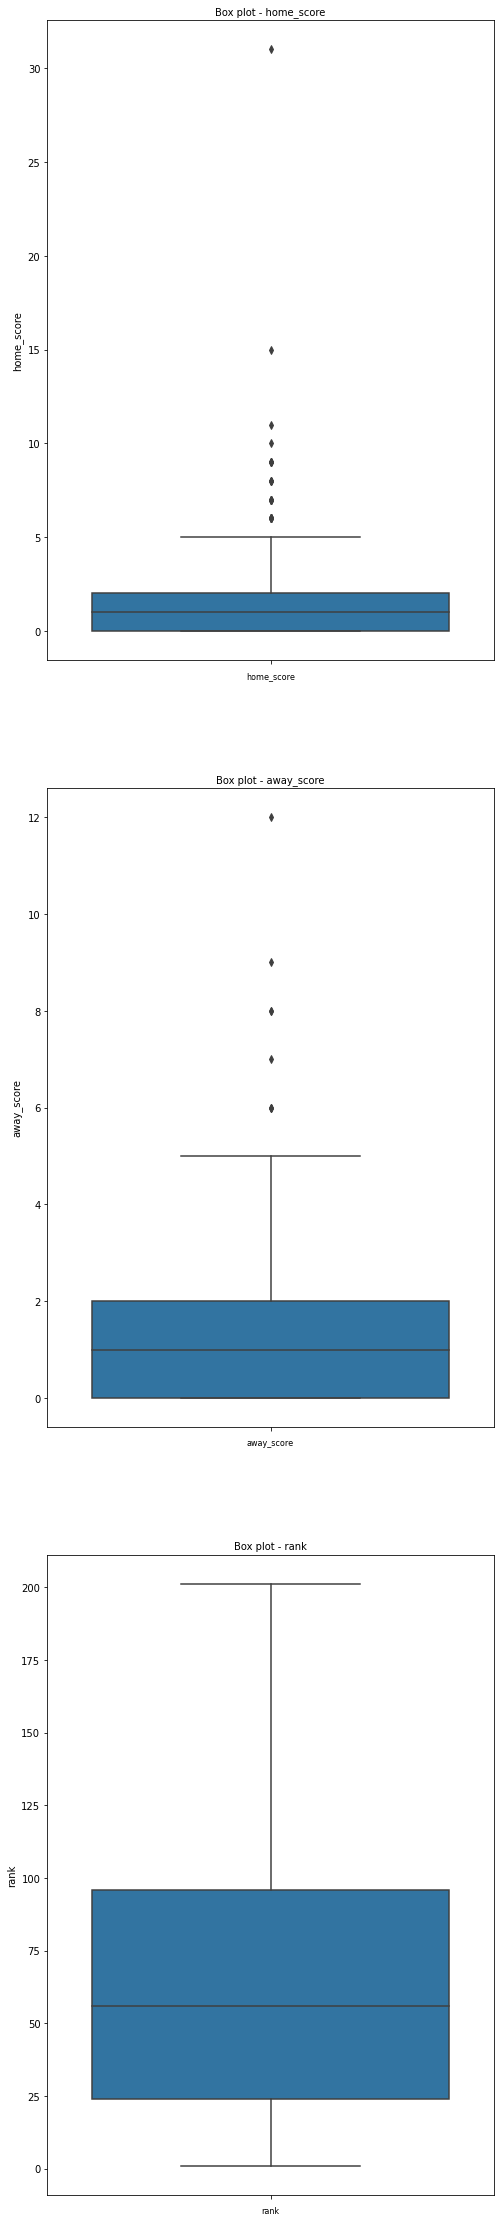

In [ ]:
#Checking for outliers
col_names =['home_score','away_score', 'rank']

fig, ax= plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y= fifa_clean[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10 )
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [ ]:
# Checking for outliers in the home score column

Q1 = fifa_clean.home_score.quantile(0.25)
Q3 = fifa_clean.home_score.quantile(0.75)

IQR = Q3 - Q1

outliers = ((fifa_clean.home_score < Q1 - 1.5 * IQR) | (fifa_clean.home_score > Q3 + 1.5 * IQR))
outliers.value_counts()

False    921
True      29
Name: home_score, dtype: int64

In [ ]:
# Checking for outliers in the away score column

Q1 = fifa_clean.away_score.quantile(0.25)
Q3 = fifa_clean.away_score.quantile(0.75)

IQR = Q3 - Q1

outliers = ((fifa_clean.away_score < Q1 - 1.5 * IQR) | (fifa_clean.home_score > Q3 + 1.5 * IQR))
outliers.value_counts()

False    921
True      29
dtype: int64

There are equal amounts of outliears for home score and away score and they are not few so i would not remove them as i feel they might be viable submissions.

In [ ]:
#Anomalies

#There were no anomalies in our dataset

## 6. Exploratory Data Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
# sumarry statistics
fifa_clean.describe()

,home_score,away_score,rank
count,950.000000,950.000000,950.000000
mean,1.657895,1.042105,64.905263
std,1.918743,1.234521,48.075168
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,24.000000
50%,1.000000,1.000000,56.000000
75%,2.000000,2.000000,96.000000
max,31.000000,12.000000,201.000000


In [ ]:
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 17915 to 39833
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        950 non-null    datetime64[ns]
 1   home_team   950 non-null    object        
 2   away_team   950 non-null    object        
 3   home_score  950 non-null    int64         
 4   away_score  950 non-null    int64         
 5   tournament  950 non-null    object        
 6   neutral     950 non-null    bool          
 7   rank        950 non-null    float64       
 8   status      950 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 107.7+ KB


In [ ]:
# Creating a Frequency table of column type of gender categories 
# and using the value_counts() function
fifa_clean.status.value_counts()

Win     462
Loss    247
draw    241
Name: status, dtype: int64

There were more wins from home team

In [ ]:
fifa_clean.tournament.value_counts()

Friendly                                      600
FIFA World Cup qualification                  153
UEFA Euro qualification                        41
AFC Asian Cup qualification                    37
CONIFA World Football Cup                      15
Cyprus International Tournament                 8
AFF Championship                                7
Gulf Cup                                        7
Copa América                                    6
CECAFA Cup                                      6
AFC Asian Cup                                   6
African Nations Championship                    5
African Cup of Nations qualification            5
CFU Caribbean Cup                               5
Gold Cup qualification                          5
Windward Islands Tournament                     4
SAFF Cup                                        4
African Cup of Nations                          4
King's Cup                                      3
Viva World Cup                                  3


There were more Friendly games than the rest type of tournament

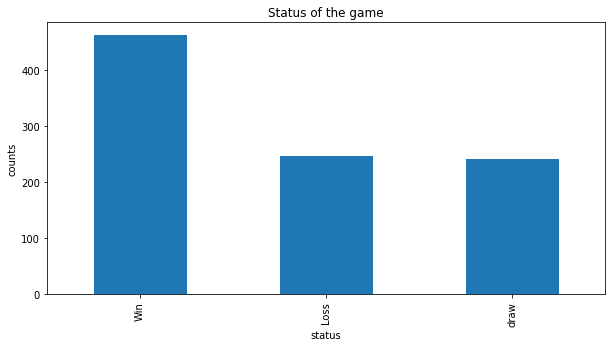

In [ ]:

# status type bar graph 

plt.figure(figsize=(10,5))
fifa_clean['status'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title('Status of the game')
plt.xlabel('status');
# there are more wins

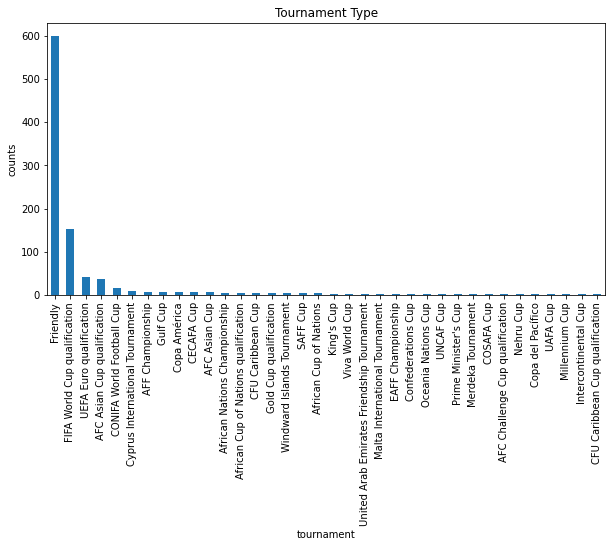

In [ ]:
# tournament type bar graph 

plt.figure(figsize=(10,5))
fifa_clean['tournament'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title('Tournament Type')
plt.xlabel('tournament');
#the most played tournament game is friendly.

## 7. Regression

### a). Polynomial regression analysis

LDA

In [ ]:
fifa_clean.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,status
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59.0,Win
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,8.0,draw


In [ ]:
#creating a dataframe for home team,in order to have its rank
fifa_home= fifa_clean[fifa_clean['status']!= 'Loss']
fifa_home

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,status
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59.0,Win
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,8.0,draw
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,35.0,Win
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,65.0,Win
17921,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False,50.0,Win
...,...,...,...,...,...,...,...,...,...
39827,2018-06-07,Tamil Eelam,Tuvalu,4,3,CONIFA World Football Cup,True,12.0,Win
39829,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,True,12.0,Win
39831,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,True,12.0,Win
39832,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,True,12.0,Win


In [ ]:
#creating a dataframe for Away team,in order to have its rank
fifa_away= fifa_clean[fifa_clean['status']!= 'Win']
fifa_away

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,status
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,8.0,draw
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,67.0,Loss
17920,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,False,70.0,Loss
17977,1993-09-23,Saudi Arabia,Costa Rica,1,2,Friendly,False,44.0,Loss
18019,1993-10-22,Iran,Iraq,1,2,FIFA World Cup qualification,True,51.0,Loss
...,...,...,...,...,...,...,...,...,...
39823,2018-06-07,South Korea,Bolivia,0,0,Friendly,True,26.0,draw
39824,2018-06-07,Iceland,Ghana,2,2,Friendly,False,22.0,draw
39826,2018-06-07,India,New Zealand,1,2,Intercontinental Cup,False,97.0,Loss
39828,2018-06-07,Tibet,Kabylia,1,8,CONIFA World Football Cup,True,12.0,Loss


In [ ]:
Fifa_encode =fifa_clean.copy(deep=True)
Fifa_encode['neutral']=Fifa_encode['neutral'].astype('category')
#Fifa_encode['status']=Fifa_encode['status'].astype('category')
Fifa_encode['tournament']=Fifa_encode['tournament'].astype('category')
Fifa_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 17915 to 39833
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        950 non-null    datetime64[ns]
 1   home_team   950 non-null    object        
 2   away_team   950 non-null    object        
 3   home_score  950 non-null    int64         
 4   away_score  950 non-null    int64         
 5   tournament  950 non-null    category      
 6   neutral     950 non-null    category      
 7   rank        950 non-null    float64       
 8   status      950 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 102.9+ KB


In [ ]:
#label encoding the categorical data
from sklearn.preprocessing import LabelEncoder

LabelEncoder =LabelEncoder()

Fifa_encode['neutral']=LabelEncoder.fit_transform(Fifa_encode['neutral'])
#Fifa_encode['status']=LabelEncoder.fit_transform(Fifa_encode['status'])
Fifa_encode['tournament']=LabelEncoder.fit_transform(Fifa_encode['tournament'])
Fifa_encode.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,status
17915,1993-08-08,Bolivia,Uruguay,3,1,17,0,59.0,Win
17916,1993-08-08,Brazil,Mexico,1,1,18,0,8.0,draw
17917,1993-08-08,Ecuador,Venezuela,5,0,17,0,35.0,Win
17918,1993-08-08,Guinea,Sierra Leone,1,0,18,0,65.0,Win
17919,1993-08-08,Paraguay,Argentina,1,3,17,0,67.0,Loss


In [ ]:
#separating target label; 'status' from other features
feature = Fifa_encode.drop(['home_score','status', 'date', 'home_team', 'away_team'], 1)
fifa_label = Fifa_encode['home_score']
feature

,away_score,tournament,neutral,rank
17915,1,17,0,59.0
17916,1,18,0,8.0
17917,0,17,0,35.0
17918,0,18,0,65.0
17919,3,17,0,67.0
...,...,...,...,...
39829,0,10,1,12.0
39830,5,10,0,12.0
39831,0,10,1,12.0
39832,2,10,1,12.0


In [ ]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda= LDA()

lda_ = lda.fit(feature, fifa_label)
lda_feat = lda_.transform(feature)

#Display the coefficient of reducted columns
lda_.coef_

array([[ 1.32452705e-01,  9.14898594e-03,  4.49618672e-02,
         3.25852852e-03],
       [ 5.88226642e-02,  1.15356949e-02, -1.93855703e-01,
         5.61391499e-05],
       [-9.49518110e-02, -3.38582027e-03,  1.40610371e-02,
        -2.71600925e-03],
       [-6.14709558e-02, -9.85120649e-03,  2.09790620e-01,
        -2.35722067e-03],
       [-7.94928008e-02, -4.36275016e-02, -6.02971298e-02,
        -3.50953640e-03],
       [-2.50049754e-01, -4.16904638e-02, -7.91544873e-01,
        -1.56107008e-03],
       [-3.85404199e-02, -8.71492187e-03,  1.41910736e+00,
         1.01551387e-02],
       [-3.88496942e-01, -6.64342845e-02,  1.14179564e+00,
         3.78622044e-03],
       [-3.66871981e-01,  1.09547867e-01,  1.18050711e+00,
        -8.08728051e-03],
       [-9.33627217e-01, -1.53419005e-01,  3.71340851e+00,
         1.86811223e-02],
       [-6.63467434e-01, -2.26536532e-02, -8.75365143e-01,
         2.80937743e-03],
       [-7.00068713e-01, -5.96516405e-04, -8.61987162e-01,
      

In [ ]:
#create a dataframe so that we can extract the names of columns
f_df = pd.DataFrame(index=feature.columns.values, data=lda_.coef_[0].T)
f_df.sort_values(0, ascending=False)

,0
away_score,0.132453
neutral,0.044962
tournament,0.009149
rank,0.003259


The following features have great effect on the dataset.
* away score
* neutral
* tournament
* rank

MULTICOLLINERITY

In [ ]:
#checing for unique values in the dataset.
for i in Fifa_encode.columns:
 print(Fifa_encode[i].unique())
 print ("\n")

['1993-08-08T00:00:00.000000000' '1993-09-23T00:00:00.000000000'
 '1993-10-22T00:00:00.000000000' '1994-03-15T00:00:00.000000000'
 '1994-04-19T00:00:00.000000000' '1994-05-17T00:00:00.000000000'
 '1994-10-25T00:00:00.000000000' '1994-11-22T00:00:00.000000000'
 '1995-04-19T00:00:00.000000000' '1995-07-25T00:00:00.000000000'
 '1996-01-24T00:00:00.000000000' '1996-02-21T00:00:00.000000000'
 '1996-04-24T00:00:00.000000000' '1996-08-28T00:00:00.000000000'
 '1996-09-25T00:00:00.000000000' '1996-10-23T00:00:00.000000000'
 '1996-12-18T00:00:00.000000000' '1997-04-09T00:00:00.000000000'
 '1997-06-18T00:00:00.000000000' '1997-08-20T00:00:00.000000000'
 '1997-10-17T00:00:00.000000000' '1997-11-19T00:00:00.000000000'
 '1997-12-23T00:00:00.000000000' '1998-02-18T00:00:00.000000000'
 '1998-03-18T00:00:00.000000000' '1998-04-22T00:00:00.000000000'
 '1998-05-20T00:00:00.000000000' '1998-07-15T00:00:00.000000000'
 '1998-08-19T00:00:00.000000000' '1998-09-16T00:00:00.000000000'
 '1998-10-21T00:00:00.000

In [ ]:
# Let's display the correlations between the variables
correlations = feature.corr()
correlations

,away_score,tournament,neutral,rank
away_score,1.000000,-0.049671,0.147866,0.052657
tournament,-0.049671,1.000000,-0.116347,-0.118195
neutral,0.147866,-0.116347,1.000000,0.023620
rank,0.052657,-0.118195,0.023620,1.000000


It shows that there are very week relation between the variables

In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,away_score,tournament,neutral,rank
away_score,1.025662,0.028235,-0.147261,-0.047193
tournament,0.028235,1.028391,0.112702,0.117402
neutral,-0.147261,0.112702,1.034967,-0.003371
rank,-0.047193,0.117402,-0.003371,1.016441


The VIF score is less than 1.05 which indicates that the independent variables are not correleted

MODEL 1: Predict how many goals the home team scores.

A) using rank

In [458]:
# Splitting our dataset
#

X = Fifa_encode.drop(['home_score','date','home_team','away_team','status','neutral','away_score','tournament'], axis=1)
y = Fifa_encode['home_score']

from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

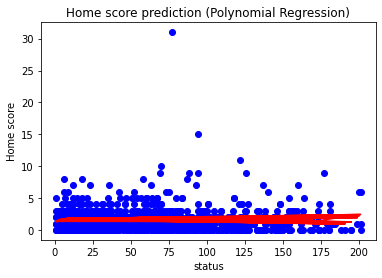

In [460]:
# Fit polynomial Regression to the dataset
poly_reg_7 = PolynomialFeatures(degree = 7) 
X_poly = poly_reg_7.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home score prediction (Polynomial Regression)')
plt.xlabel('status')
plt.ylabel('Home score')
plt.show()

CROSS VALIDATING THE MODEL

In [461]:
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)
RMSES = []
for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = pol_reg.fit(X_poly, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    rmse= np.sqrt(np.mean(np.abs(scores)))
    RMSES.append(rmse)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + " Root Mean Squared Error:"+ str(rmse) + ", STD: " + str(np.std(scores)))
    

Degree-1 polynomial MSE: 3.697408774857685 Root Mean Squared Error:1.922864731294868, STD: 3.1096408733112644
Degree-2 polynomial MSE: 3.7052477378367987 Root Mean Squared Error:1.9249020073335679, STD: 3.10226209924887
Degree-3 polynomial MSE: 3.708495022738236 Root Mean Squared Error:1.9257453161667655, STD: 3.1019096104896295
Degree-4 polynomial MSE: 3.711035814214206 Root Mean Squared Error:1.926404893633269, STD: 3.0919215777646247
Degree-5 polynomial MSE: 3.723761049733233 Root Mean Squared Error:1.929704912605353, STD: 3.081835216488091
Degree-6 polynomial MSE: 3.729335517932973 Root Mean Squared Error:1.9311487560343383, STD: 3.088975882086599
Degree-7 polynomial MSE: 3.6978134655983235 Root Mean Squared Error:1.9229699596193186, STD: 3.079944814663827
Degree-8 polynomial MSE: 3.7030709143834364 Root Mean Squared Error:1.924336486787962, STD: 3.0841679341087826
Degree-9 polynomial MSE: 3.7044728468038004 Root Mean Squared Error:1.924700716164412, STD: 3.092903541775789
Degree-1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Shows that polynomial degree of 6 has high means score error and 7 has the lowest.

RMSE VALUE

In [462]:
np.mean(RMSES)

1.9256957413025895

The lower the RMSE, the better a given model is able to “fit” a dataset.
degree 7 has the lowest RMSE value, which means it better fits the data set.

CREATING RESIDUAL PLOT

In [463]:
# This is our prediction for admission based on our model
poly_pred = pol_reg.predict(poly_reg_7.fit_transform(X))

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset


residuals = np.subtract(poly_pred, y_test)

residuals.mean()

0.6157894736841047

A residual is the vertical distance between a data point and the regression line. The positive value indicates that they are above the regression line.
Our mean on the other hand is close to 0, indicating that we tend to be fairly correct,

In [484]:
from sklearn import metrics
np.concatenate((poly_pred,residuals[:,None]),axis=0)
plt.scatter(poly_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show();



ValueError: ignored

In [435]:
# Predict home score using rank 
poly_pred = pol_reg.predict(poly_reg_7.fit_transform([[188]]))
print('Home score prediction: %d' %poly_pred)

Home score prediction: 0


B). Using tournament type

In [390]:
# Splitting our dataset
#

X = Fifa_encode.drop(['home_score','date','home_team','away_team','status','neutral','away_score','rank'], axis=1)
y = Fifa_encode['home_score']

from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

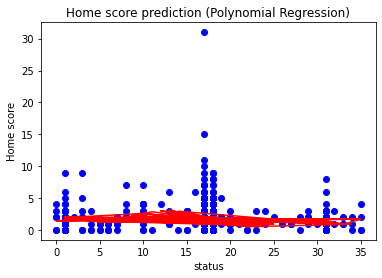

In [391]:
# Fit polynomial Regression to the dataset
poly_reg_7 = PolynomialFeatures(degree = 7) 
X_poly = poly_reg_7.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home score prediction (Polynomial Regression)')
plt.xlabel('status')
plt.ylabel('Home score')
plt.show()

In [392]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_7.fit_transform([[35]]))
print('Home score prediction: %d' %poly_pred)

Home score prediction: 1


MODEL 2: Predict how many goals the away team scores.

USING TOURNAMENT

In [393]:
# Splitting our dataset
#

X = Fifa_encode.drop(['away_score','date','home_team','away_team','status','neutral','home_score','rank'], axis=1)
y = Fifa_encode['away_score']

from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

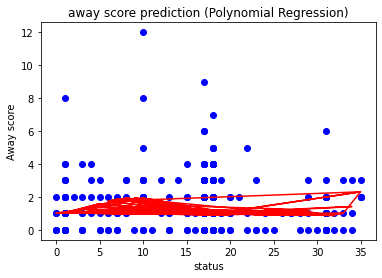

In [394]:
# Fit polynomial Regression to the dataset
poly_reg_7 = PolynomialFeatures(degree = 7) 
X_poly = poly_reg_7.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('away score prediction (Polynomial Regression)')
plt.xlabel('status')
plt.ylabel('Away score')
plt.show()

In [395]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_7.fit_transform([[10]]))
print('away score prediction: %d' %poly_pred)

away score prediction: 1


USING RANK

In [396]:
# Splitting our dataset
#

X = Fifa_encode.drop(['away_score','date','home_team','away_team','status','neutral','home_score','tournament'], axis=1)
y = Fifa_encode['away_score']

from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

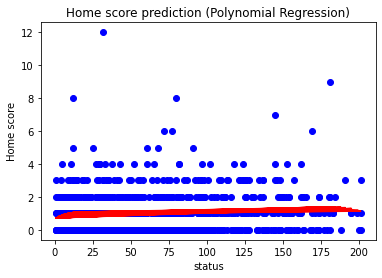

In [397]:
# Fit polynomial Regression to the dataset
poly_reg_7 = PolynomialFeatures(degree = 7) 
X_poly = poly_reg_7.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home score prediction (Polynomial Regression)')
plt.xlabel('status')
plt.ylabel('Home score')
plt.show()

In [398]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_7.fit_transform([[158]]))
print('Away score prediction: %d' %poly_pred)

Away score prediction: 1


### b). Logistic regression

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [ ]:
Fifa_encode.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank,status
17915,1993-08-08,Bolivia,Uruguay,3,1,17,0,59.0,Win
17916,1993-08-08,Brazil,Mexico,1,1,18,0,8.0,draw


In [ ]:
Fifa_encode.status.value_counts()

Win     462
Loss    247
draw    241
Name: status, dtype: int64

LDA

In [ ]:
#separating target label; 'status' from other features
feature = Fifa_encode.drop(['status', 'date', 'home_team', 'away_team'], 1)
fifa_label = Fifa_encode['status']
feature

,home_score,away_score,tournament,neutral,rank
17915,3,1,17,0,59.0
17916,1,1,18,0,8.0
17917,5,0,17,0,35.0
17918,1,0,18,0,65.0
17919,1,3,17,0,67.0
...,...,...,...,...,...
39829,2,0,10,1,12.0
39830,0,5,10,0,12.0
39831,4,0,10,1,12.0
39832,3,2,10,1,12.0


In [ ]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda= LDA()

lda_ = lda.fit(feature, fifa_label)
lda_feat = lda_.transform(feature)

#Display the coefficient of reducted columns
lda_.coef_

array([[-6.71981814e-01,  1.66665517e+00,  1.19373975e-02,
        -1.08667812e-01,  4.68019558e-03],
       [ 5.21495358e-01, -8.16775720e-01, -8.05011219e-03,
         2.33813572e-02, -2.86049665e-03],
       [-3.11001442e-01, -1.42379433e-01,  3.19757120e-03,
         6.65508822e-02,  6.86892711e-04]])

In [ ]:
#create a dataframe so that we can extract the names of columns
f_df = pd.DataFrame(index=feature.columns.values, data=lda_.coef_[0].T)
f_df.sort_values(0, ascending=False)

,0
away_score,1.666655
tournament,0.011937
rank,0.004680
neutral,-0.108668
home_score,-0.671982


The following features have great effect on the dataset. So we will use them in model creation
* away score
* tournament
* rank

In [ ]:
# Splitting our dataset
#
X = Fifa_encode.drop(['status','date', 'home_team', 'away_team','neutral'],axis=1)
y = Fifa_encode['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# Fitting our model 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver = 'liblinear',max_iter= 100000)
LogReg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using the model to make a prediction
y_pred = LogReg.predict(X_test)

In [ ]:
y_pred

array(['Win', 'draw', 'Win', 'Win', 'draw', 'Loss', 'Win', 'Win', 'Loss',
       'Win', 'draw', 'Win', 'draw', 'draw', 'draw', 'draw', 'draw',
       'Loss', 'Loss', 'Loss', 'Loss', 'Win', 'Win', 'Loss', 'draw',
       'draw', 'draw', 'Win', 'draw', 'Loss', 'Loss', 'Loss', 'Loss',
       'Win', 'draw', 'draw', 'Win', 'Win', 'draw', 'Loss', 'draw',
       'Loss', 'Win', 'Win', 'draw', 'Win', 'Loss', 'Win', 'Win', 'Loss',
       'draw', 'Win', 'Loss', 'draw', 'Win', 'Win', 'Win', 'draw', 'Win',
       'Win', 'Win', 'Win', 'Loss', 'Win', 'Loss', 'Loss', 'draw', 'Win',
       'Loss', 'draw', 'Win', 'Win', 'Win', 'Loss', 'Win', 'draw', 'Loss',
       'Win', 'Win', 'Win', 'Loss', 'draw', 'Win', 'Win', 'Win', 'draw',
       'Win', 'Win', 'Loss', 'Loss', 'Loss', 'draw', 'Win', 'Win', 'Win',
       'Loss', 'Loss', 'Win', 'Win', 'Win', 'Loss', 'draw', 'draw',
       'Loss', 'draw', 'draw', 'Win', 'Win', 'draw', 'Win', 'Loss',
       'Loss', 'draw', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win', 'Win'

In [ ]:
# Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 68,   0,   0],
       [  0, 139,   0],
       [  1,   1,  76]])

the matrix tells us that there are 68, 139 and 76 correct Win, loss and draw prediction.

## 8. Implementing the Solution

From the models that we have created, it will be now easy to predict a win,loss or draw from a game as well as the scores a team can get using the type of tournament and  the rank of the team.

## 9. Challenge the solution

In [ ]:
# Reviewing the Solution 
#
From the dataset that we were given there were missing some valuable columns like different ranks of team, that we had to create based an what was on the dataset wich might affect the type 
of model we created.

## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.


### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

Yes

### c). Did we have the right question?

Yes.